<a href="https://colab.research.google.com/github/SudeshnaBora/MI2/blob/master/MI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

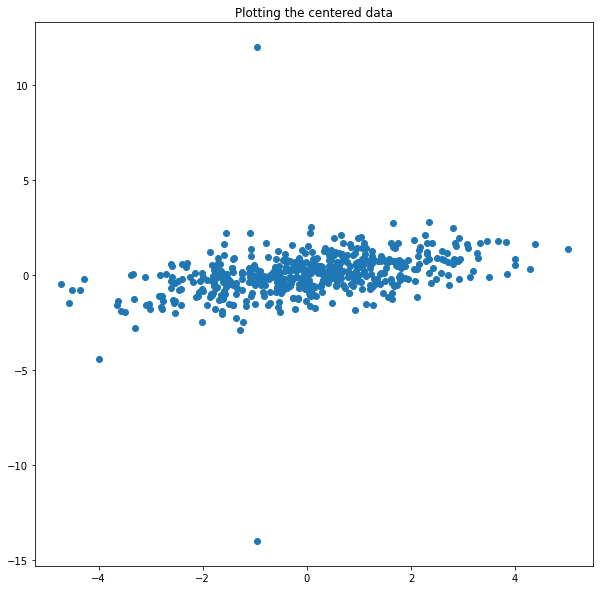

In [2]:
data1 = pd.read_csv('pca2.csv', sep=',')
data1.loc[0:2, 'X1':'X2']
data1_centered = data1 - np.mean(data1,axis=0)
covariance1 = np.cov(data1_centered.T)
evals1, evecs1 = np.linalg.eig(covariance1)
transmat1 = evecs1.T
evec1 = transmat1[0]
evec2 = transmat1[1]
data1_trans = np.array([[0.0, 0.0] for i in range(len(data1))])
for i in range(len(data1)):
    data1_trans[i] = np.dot(transmat1, data1_centered.loc[i, :])

# plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(data1_centered.loc[:, 'X1'], data1_centered.loc[:, 'X2'])
plt.title('Plotting the centered data')
plt.show()

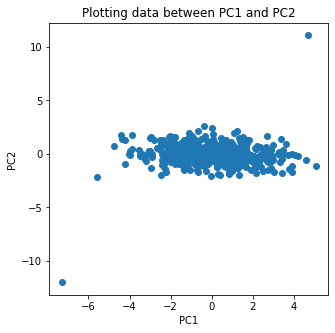

In [16]:
plt.figure(figsize=(5, 5))
plt.scatter(data1_trans.T[0], data1_trans.T[1])
plt.title('Plotting data between PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

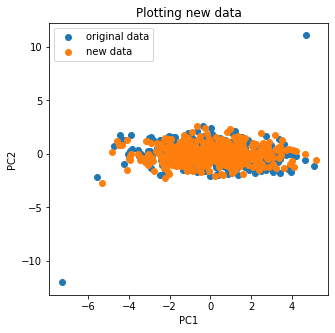

In [4]:
data1b_c = np.copy(data1_centered)
data1b_c[16, :] = 0
data1b_c[156, :] = 0

cov1b = np.cov(data1b_c.T)
evals1b, evecs1b = np.linalg.eig(cov1b)
transmat1b = evecs1b.T
evec1b = transmat1b[0]
evec2b = transmat1b[1]

data1b_t = np.array([[0.0, 0.0] for i in range(len(data1))])
for i in range(len(data1)):
    data1b_t[i] = np.dot(transmat1b, data1b_c[i, :])
plt.figure(figsize=(5, 5))
plt.scatter(data1_trans.T[0], data1_trans.T[1],label='original data')
plt.scatter(data1b_t.T[0], data1b_t.T[1],label='new data')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plotting new data')
plt.show()

**2**

In [5]:
data = np.loadtxt('pca4.csv', skiprows=1, delimiter=',')
data.shape

(500, 4)

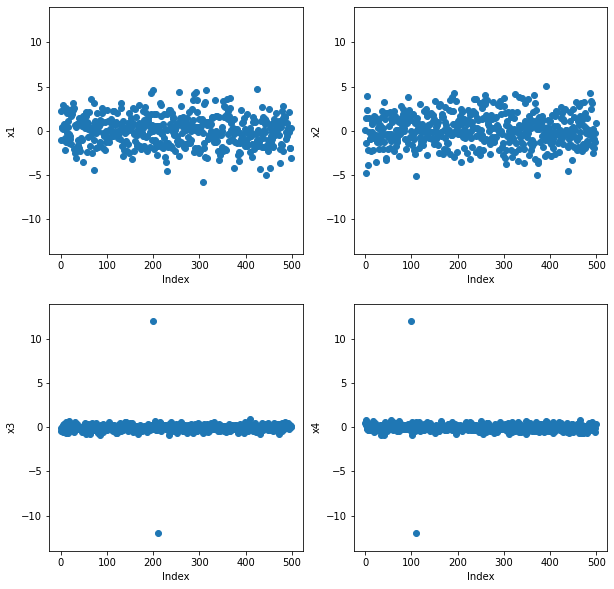

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(range(len(data)), data[:, i])
    plt.ylabel('x{}'.format(i+1))
    plt.xlabel('Index')
    plt.ylim(-14, 14)

From the first two graphs, we cannot visually determine outliers. But the graph for x3 and x4 shows outlier at around indices [195,220] and [95,120] respectively.
Plotting 3rd and 4th column among this range again.

Text(0, 0.5, '4th Col')

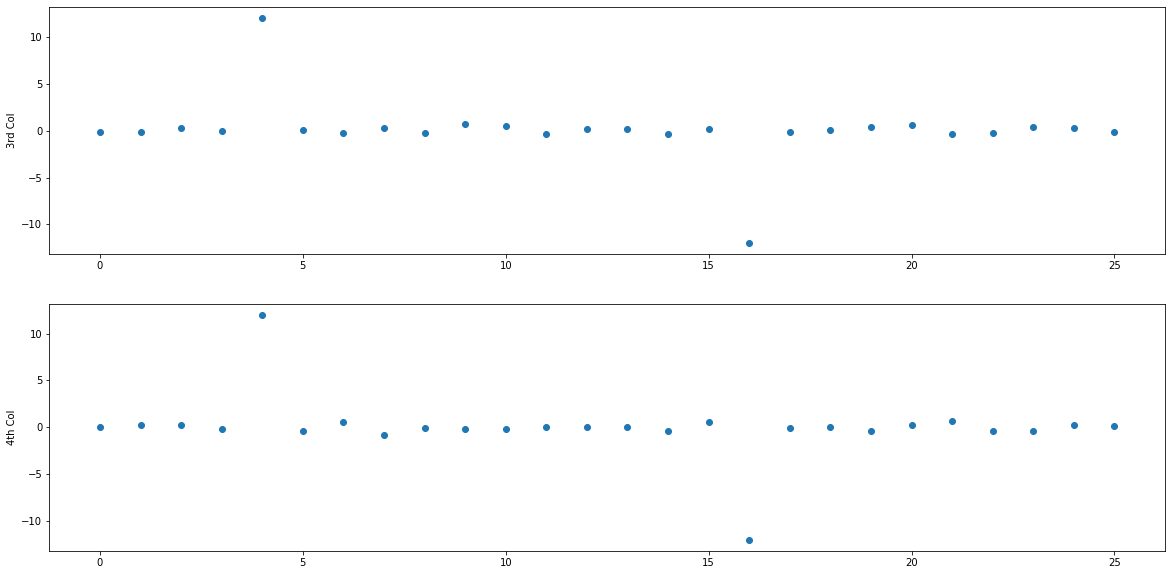

In [7]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20, 10))
ind01 = np.arange(195,221,step=1)
plt.sca(ax1)
plt.scatter(range(len(ind01)), data[ind01, 2])
plt.ylabel('3rd Col')

plt.sca(ax2)
ind02 = np.arange(95,121,step=1)
plt.scatter(range(len(ind02)),data[ind02, 3])
plt.ylabel('4th Col')

From 3rd column, we know that indices 199 and 211 are outliers.
From 4th column, we know that indices 99 and 111 are outliers.

In [0]:
filtered_data = np.delete(data, [99,111,199,211], axis=0)


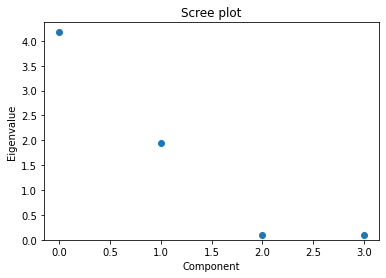

In [9]:
#This is using entire data
centered_data = filtered_data - filtered_data.mean(axis=0)
cov = np.cov(centered_data.T)
evals, evecs = np.linalg.eig(cov)
plt.plot(evals, 'o')
plt.ylabel('Eigenvalue')
plt.xlabel('Component')
plt.title('Scree plot')
plt.ylim(0)
plt.show()

We can conclude 2 PCs should be enough for this data.

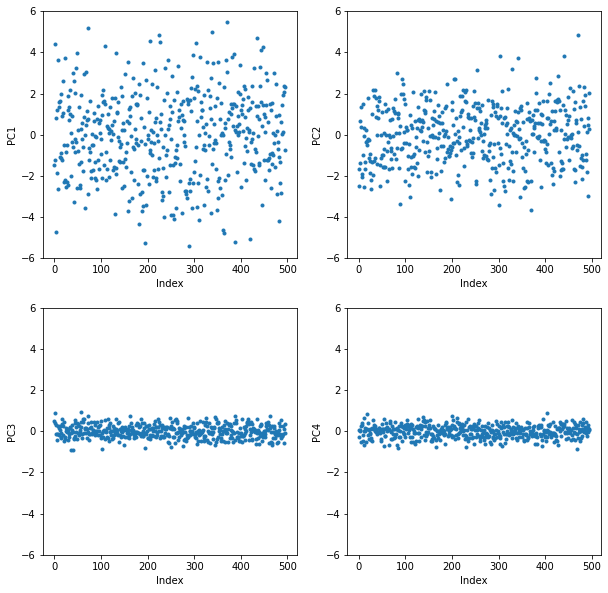

In [10]:
projected_data = np.dot(evecs.T, centered_data.T).T

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.plot(projected_data[:, i], '.')
    plt.ylabel('PC{}'.format(i+1))
    plt.xlabel('Index')
    plt.ylim(-6, 6)

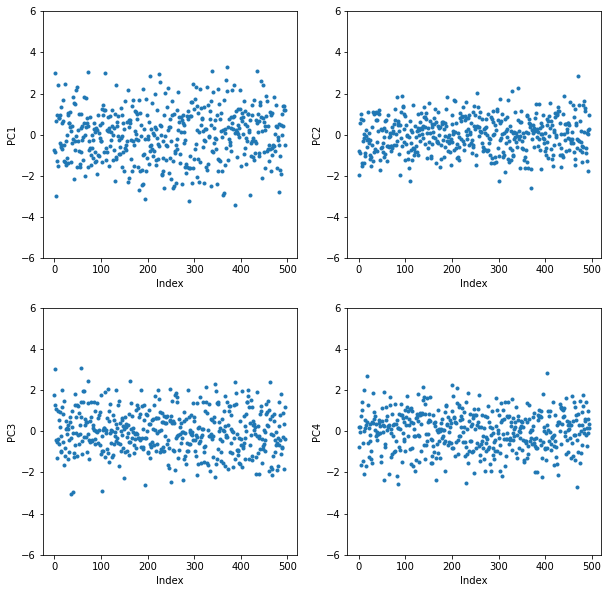

In [11]:
whitened_data = np.diag(1 / np.sqrt(evals)).dot(centered_data.T).T.dot(evecs.T)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.plot(whitened_data[:, i], '.')
    plt.ylabel('PC{}'.format(i+1))
    plt.xlabel('Index')
    plt.ylim(-6, 6)

Text(0, 0.5, 'Dimension')

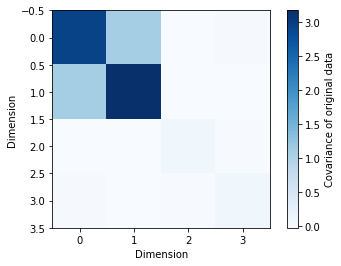

In [12]:
plt.imshow(cov, cmap='Blues')
plt.colorbar(label='Covariance of original data')
plt.xlabel('Dimension')
plt.ylabel('Dimension')

Text(0, 0.5, 'Dimension')

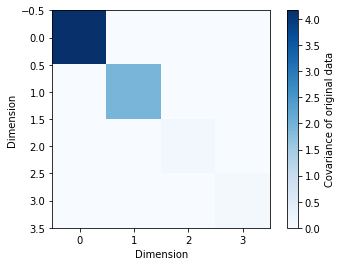

In [13]:
plt.imshow(np.cov(projected_data.T), cmap='Blues')
plt.colorbar(label='Covariance of original data')
plt.xlabel('Dimension')
plt.ylabel('Dimension')

Text(0, 0.5, 'Dimension')

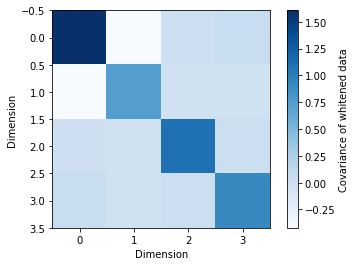

In [14]:
plt.imshow(np.cov(whitened_data.T), cmap='Blues')
plt.colorbar(label='Covariance of whitened data')
plt.xlabel('Dimension')
plt.ylabel('Dimension')

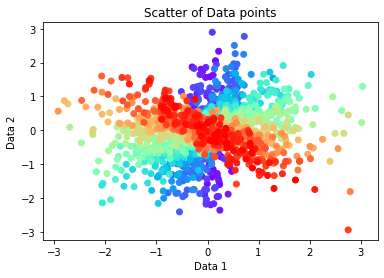

In [15]:
data = pd.read_csv('data-onlinePCA.txt', index_col=0).to_numpy()

timesteps = np.linspace(0, 1, len(data))
colors = plt.cm.rainbow(timesteps)
plt.scatter(data[:, 0], data[:, 1], color=colors)
plt.title('Scatter of Data points')
plt.xlabel('Data 1')
plt.ylabel('Data 2')
plt.show()